## Apprentissage par Machines à Vecteurs  de Support ##

#### Préparation des données

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import time
import numpy as np
from matplotlib import pyplot as plt


mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
# On echantillonne pour faciliter les tests car les temps d'éxecution sont conséquents
indexs = np.random.randint(len(mnist.data), size= 7000)
data = np.array([mnist.data[i] for i in indexs])
target = np.array([mnist.target[i] for i in indexs])
                   
# Diviser la base de données à 70% pour l’apprentissage (training) et à 30% pour les tests  
pourcentage_de_données = 0.7
xtrain,  xtest,  ytrain,  ytest = train_test_split(data, target, train_size = pourcentage_de_données)

In [3]:
# Construire un modèle de classification ayant comme paramètres un noyau linear: clsvm = svm.SVC(kernel=’linear’)
clsvm = SVC(kernel='linear').fit(xtrain, ytrain)
predicted = clsvm.predict(data)
print(target[1:10])
print(predicted[1:10])

['9' '6' '9' '8' '6' '3' '1' '0' '7']
['9' '6' '9' '8' '6' '3' '1' '0' '7']


#### Analyse de la fonction noyau ‘poly’, ‘rbf’, ‘sigmoid’, ‘linear’.  

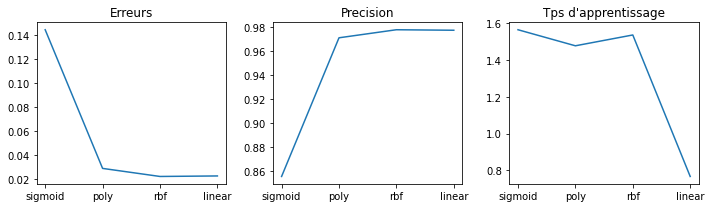

In [50]:
from sklearn.metrics import zero_one_loss
noyaux=['sigmoid', 'poly', 'rbf', 'linear']

errors = []
recalls = []
precisions = []
times = []

for n in noyaux:
    #print(n)
    start = time.time()
    clf = SVC(kernel = n).fit(xtrain, ytrain)
    end = time.time()
    recall = recall_score(target, clf.predict(data), average = 'micro')
    precision = precision_score(target, clf.predict(data), average='micro')
    error = zero_one_loss(target, clf.predict(data))
    tps = end-start
    
    errors.append(error)
    recalls.append(recall)
    precisions.append(precision)
    times.append(tps)
    
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(noyaux, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(noyaux, precisions) 
ax[1].set_title('Precision') 

ax[2].plot(noyaux, times) 
ax[2].set_title('Tps d\'apprentissage') 

plt.tight_layout()
plt.show()

#### Analyse de la tolérance aux erreurs C 

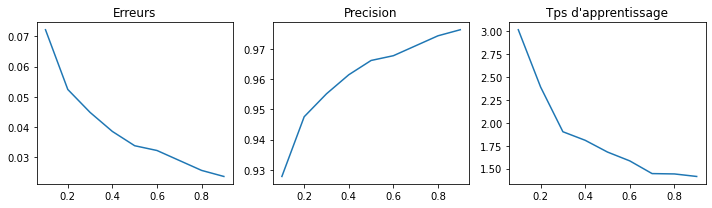

In [51]:
errors = []
recalls = []
precisions = []
times = []
axis_x = []

for c in np.arange(0.1, 1, 0.1):
    start = time.time()
    clf = SVC(kernel = 'rbf', C = c).fit(xtrain, ytrain)
    end = time.time()
    #recall = recall_score(target, clf.predict(data), average = 'micro')
    precision = precision_score(target, clf.predict(data), average = 'micro')
    error = zero_one_loss(target, clf.predict(data))
    tps = end-start
    
    #print("C : ", c, " Errors : ", error, " Precision : " ,precision, " Recall : ", recall )
    
    axis_x.append(c)
    errors.append(error)
    #recalls.append(recall)
    precisions.append(precision)
    times.append(tps)
    
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(axis_x, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(axis_x, precisions) 
ax[1].set_title('Precision') 

ax[2].plot(axis_x, times) 
ax[2].set_title('Tps d\'apprentissage') 

plt.tight_layout()
plt.show()

#### Tracez la courbe d’erreur de classification sur les données d’entrainement et de test en fonction de C.

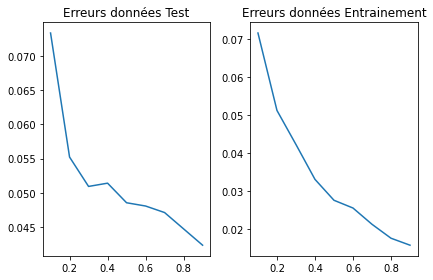

In [31]:
errors_test = []
errors_train = []
axis_x = []

for c in np.arange(0.1, 1, 0.1):
    clf = SVC(kernel = 'rbf', C = c).fit(xtrain, ytrain)
    error_test = zero_one_loss(ytest, clf.predict(xtest))
    error_train = zero_one_loss(ytrain, clf.predict(xtrain))
    
    errors_test.append(error_test)
    errors_train.append(error_train)
    axis_x.append(c)
    
plt.subplot(1, 2, 1)
plt.plot(axis_x, errors_test)
plt.title("Erreurs données Test")

plt.subplot(1, 2, 2)
plt.plot(axis_x, errors_train)
plt.title("Erreurs données Entrainement")

plt.tight_layout()
plt.show()

#### Matrice de confusion

In [32]:
from sklearn.metrics import confusion_matrix

clf = SVC(kernel = 'rbf', C = 1).fit(xtrain, ytrain)
cm = confusion_matrix(target, clf.predict(data))

<AxesSubplot:>

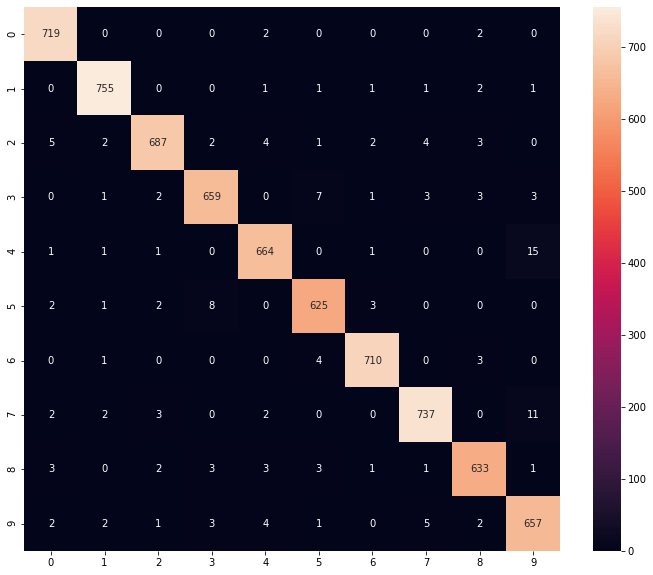

In [49]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True, fmt = 'd')

## Comparatifs des 3 méthodes

### SVM

In [20]:
errors = []
precisions = []
times = []

In [21]:
start = time.time()
clf = SVC(kernel = 'rbf', C = 1).fit(xtrain, ytrain)
end = time.time()
precision = precision_score(target, clf.predict(data), average = 'micro')
error = zero_one_loss(target, clf.predict(data))

tps = end-start
errors.append(error)
precisions.append(precision)
times.append(tps)

cm_svc = confusion_matrix(target, clf.predict(data))
print(cm_svc)

[[689   1   0   0   0   2   1   0   2   0]
 [  0 735   2   1   1   1   0   1   0   1]
 [  1   1 684   2   4   1   4   4   0   0]
 [  1   2   7 692   0   5   1   3   4   2]
 [  0   1   1   0 639   0   2   2   0   7]
 [  3   0   0  11   2 626   5   1   2   1]
 [  0   4   0   0   1   5 728   0   3   0]
 [  1   3   5   0   3   0   0 700   1   7]
 [  0   5   2   3   1   3   5   0 629   2]
 [  0   3   0   3   8   1   0  14   3 699]]


### MLP

In [22]:
from sklearn.neural_network import MLPClassifier
layers = [50, 250 ,50 ,100 ,50 ,150 ,100 ,50]

start = time.time()
clf = MLPClassifier(hidden_layer_sizes = layers, solver = 'adam', activation = 'relu', alpha = 0.1).fit(xtrain, ytrain)
end = time.time()
precision = precision_score(target, clf.predict(data), average = 'micro')
error = zero_one_loss(target, clf.predict(data))

tps = end-start
errors.append(error)
precisions.append(precision)
times.append(tps)

cm_mlp = confusion_matrix(target, clf.predict(data))
print(cm_mlp)

[[687   0   0   0   0   0   0   0   7   1]
 [  0 735   2   0   0   3   2   0   0   0]
 [  2   0 686   1   4   0   0   3   5   0]
 [  0   1   7 680   0   7   0   2  20   0]
 [  0   2   0   0 645   0   1   1   0   3]
 [  2   0   0   7   1 621   3   1  15   1]
 [  2   3   3   0   2   4 725   0   2   0]
 [  0   1   6   0   1   0   0 705   0   7]
 [  0   4   0   0   1   0   0   0 642   3]
 [  0   2   0   0  12   1   0   3   6 707]]


### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

start=time.time()
clf = KNeighborsClassifier (n_neighbors=3, p=2).fit(xtrain, ytrain)
end = time.time()
precision = precision_score(target, clf.predict(data), average = 'micro')
error = zero_one_loss(target, clf.predict(data))

tps = end-start
errors.append(error)
precisions.append(precision)
times.append(tps)

cm_knn = confusion_matrix(target, clf.predict(data))
print(cm_knn)

[[690   1   0   0   0   3   1   0   0   0]
 [  0 739   1   0   1   0   0   1   0   0]
 [  9   9 666   0   0   1   1  12   1   2]
 [  2   4   2 689   0   8   1   4   4   3]
 [  0   5   3   0 624   0   1   1   0  18]
 [  7   6   1  19   0 606   7   0   0   5]
 [  2   5   0   0   2   6 726   0   0   0]
 [  0  15   2   1   5   0   0 688   0   9]
 [  5  16   4  13   7  11   4   1 584   5]
 [  3   5   0   5   6   2   1  16   0 693]]


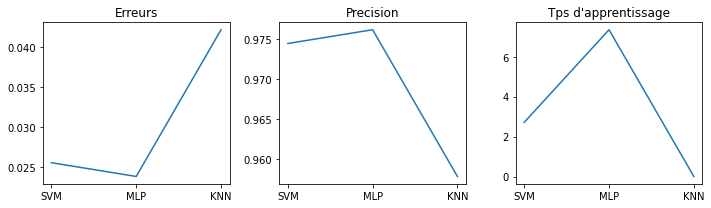

In [24]:
axis_x = ['SVM', 'MLP','KNN']
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(axis_x, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(axis_x, precisions) 
ax[1].set_title('Precision') 

ax[2].plot(axis_x, times) 
ax[2].set_title('Tps d\'apprentissage') 

plt.tight_layout()
plt.show()